In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline
pp.style.use('seaborn-ticks')

In [3]:
def figsize(scale):
    """Calculate figure size with golden ratio and Latex line width."""

    fig_width_pt = 433.62001
    inches_per_pt = 1.0/72.0
    golden_mean = (np.sqrt(5.0)-1.0)/2.0
    fig_width = fig_width_pt*inches_per_pt*scale
    fig_height = fig_width*golden_mean
    fig_size = [fig_width, fig_height]
    return fig_size

In [4]:
figsize(1)

[6.022500138888888, 3.7221097830842953]

In [5]:
# Load inputs to calculation from .csv files.
asym_corr = pd.read_csv('data/al_asym_corrections_thesis_high_stat.csv')
bk_frac = pd.read_csv('data/al_background_fractions_thesis_high_stat_avg.csv')

In [6]:
# Concatenate asymmetry corrections and calculated background fractions
inputs = pd.concat([asym_corr, bk_frac], axis=1)

In [16]:
#inputs_t = inputs.transpose()
#inputs_t.to_csv('data/mc_apv_inputs_test.csv')

In [7]:
n_sample = 10000 # Number of Samples
label = inputs.columns
sample = np.arange(0,n_sample)

In [8]:
index = pd.MultiIndex.from_product([label,sample],names=['label','sample'])

In [9]:
data = pd.DataFrame(np.array(inputs.loc[0])*np.ones((len(label)*len(sample),(len(label)))), index=index, columns=label)

In [10]:
def fill_diagonal(inputs, df, label):
    for l in label:
        df[l].loc[l] = np.random.normal(inputs[l].loc[0], inputs[l].loc[1], len(sample))

In [11]:
fill_diagonal(inputs, data, label)

In [12]:
data['A_pv'] = np.ones((len(label)*len(sample),1))

In [13]:
data.head()

A_844keV  A_1014keV  A_2211keV  A_2735keV  A_2990keV  \
label    sample                                                         
A_844keV 0       2.967614     2.5634     2.5428     2.5903     2.6166   
         1       1.996091     2.5634     2.5428     2.5903     2.6166   
         2       2.304674     2.5634     2.5428     2.5903     2.6166   
         3       2.034532     2.5634     2.5428     2.5903     2.6166   
         4       2.314081     2.5634     2.5428     2.5903     2.6166   

                 A_4580keV  A_4812keV  A_5430keV  A_5668keV  A_7228keV  ...   \
label    sample                                                         ...    
A_844keV 0          2.7831     2.3788     2.4897     2.5425     2.7063  ...    
         1          2.7831     2.3788     2.4897     2.5425     2.7063  ...    
         2          2.7831     2.3788     2.4897     2.5425     2.7063  ...    
         3          2.7831     2.3788     2.4897     2.5425     2.7063  ...    
         4          2.7831     2.3788     2.4897     2.5425     2.7063  ...    

                     f_Fe     f_Mg      f_Si      f_Zn     f_GDR  f_inelastic  \
label    sample                                                                 
A_844keV 0       0.000535  0.02086  0.000801  0.023724  0.005777      0.07383   
         1       0.000535  0.02086  0.000801  0.023724  0.005777      0.07383   
         2       0.000535  0.02086  0.000801  0.023724  0.005777      0.07383   
         3       0.000535  0.02086  0.000801  0.023724  0.005777      0.07383   
         4       0.000535  0.02086  0.000801  0.023724  0.005777      0.07383   

                     f_Mn   f_quasi      f_Ti  A_pv  
label    sample                                      
A_844keV 0       0.000179  0.127548  0.000136   1.0  
         1       0.000179  0.127548  0.000136   1.0  
         2       0.000179  0.127548  0.000136   1.0  
         3       0.000179  0.127548  0.000136   1.0  
         4       0.000179  0.127548  0.000136   1.0  

[5 rows x 58 columns]

In [14]:
#label

In [14]:
def calculate_apv_uncertainty(inputs, label):
    '''Calculate A_pv uncertainty'''
    
    for l in label:
        # Calculate the A_msr/P ratio
        A_msr_pol = (inputs.loc[l].A_msr +
                     inputs.loc[l].A_reg +
                     inputs.loc[l].A_trans +
                     inputs.loc[l].A_nonlin +
                     inputs.loc[l].A_beamline +
                     inputs.loc[l].A_bias)/inputs.loc[l].P

        # Calculate numerator
        A_num = A_msr_pol - (inputs.loc[l].f_neutral * inputs.loc[l].A_neutral +
                             inputs.loc[l].f_quasi * inputs.loc[l].A_quasi +
                             inputs.loc[l].f_inelastic * inputs.loc[l].A_inelastic +
                             inputs.loc[l].f_844keV * inputs.loc[l].A_844keV +
                             inputs.loc[l].f_1014keV * inputs.loc[l].A_1014keV +
                             inputs.loc[l].f_2211keV * inputs.loc[l].A_2211keV +
                             inputs.loc[l].f_2735keV * inputs.loc[l].A_2735keV +
                             inputs.loc[l].f_2990keV * inputs.loc[l].A_2990keV +
                             inputs.loc[l].f_4580keV * inputs.loc[l].A_4580keV +
                             inputs.loc[l].f_4812keV * inputs.loc[l].A_4812keV +
                             inputs.loc[l].f_5430keV * inputs.loc[l].A_5430keV +
                             inputs.loc[l].f_5668keV * inputs.loc[l].A_5668keV +
                             inputs.loc[l].f_7228keV * inputs.loc[l].A_7228keV +
                             inputs.loc[l].f_7477keV * inputs.loc[l].A_7477keV +
                             inputs.loc[l].f_GDR * inputs.loc[l].A_GDR +
                             inputs.loc[l].f_Zn * inputs.loc[l].A_Zn +
                             inputs.loc[l].f_Mg * inputs.loc[l].A_Mg +
                             inputs.loc[l].f_Cu * inputs.loc[l].A_Cu +
                             inputs.loc[l].f_Cr * inputs.loc[l].A_Cr +
                             inputs.loc[l].f_Fe * inputs.loc[l].A_Fe +
                             inputs.loc[l].f_Si * inputs.loc[l].A_Si +
                             inputs.loc[l].f_Mn * inputs.loc[l].A_Mn +
                             inputs.loc[l].f_Ti * inputs.loc[l].A_Ti)

        # Calculate denominator
        A_denom = 1.0 - (inputs.loc[l].f_beamline +
                         inputs.loc[l].f_neutral +
                         inputs.loc[l].f_quasi +
                         inputs.loc[l].f_inelastic +
                         inputs.loc[l].f_844keV +
                         inputs.loc[l].f_1014keV +
                         inputs.loc[l].f_2211keV +
                         inputs.loc[l].f_2735keV +
                         inputs.loc[l].f_2990keV +
                         inputs.loc[l].f_4580keV +
                         inputs.loc[l].f_4812keV +
                         inputs.loc[l].f_5430keV +
                         inputs.loc[l].f_5668keV +
                         inputs.loc[l].f_7228keV +
                         inputs.loc[l].f_7477keV +
                         inputs.loc[l].f_GDR +
                         inputs.loc[l].f_Zn +
                         inputs.loc[l].f_Mg +
                         inputs.loc[l].f_Cu +
                         inputs.loc[l].f_Cr +
                         inputs.loc[l].f_Fe +
                         inputs.loc[l].f_Si +
                         inputs.loc[l].f_Mn +
                         inputs.loc[l].f_Ti)
        A_pv = (A_num / A_denom)*inputs.loc[l].R_det*inputs.loc[l].R_acc
        # Calculate the parity-violating physics asymmetry
        inputs.loc[l,'A_pv'] = np.array(A_pv)

In [15]:
def calculate_apv(inputs):
    '''Calculate A_pv'''

    # Calculate the A_msr/P ratio
    A_msr_pol = (inputs.loc['A_msr'].A_msr +
                 inputs.loc['A_reg'].A_reg +
                 inputs.loc['A_trans'].A_trans +
                 inputs.loc['A_nonlin'].A_nonlin +
                 inputs.loc['A_beamline'].A_beamline +
                 inputs.loc['A_bias'].A_bias)/inputs.loc['P'].P
    # Calculate numerator
    A_num = A_msr_pol - (inputs.loc['f_neutral'].f_neutral * inputs.loc['A_neutral'].A_neutral +
                         inputs.loc['f_quasi'].f_quasi * inputs.loc['A_quasi'].A_quasi +
                         inputs.loc['f_inelastic'].f_inelastic * inputs.loc['A_inelastic'].A_inelastic +
                         inputs.loc['f_844keV'].f_844keV * inputs.loc['A_844keV'].A_844keV +
                         inputs.loc['f_1014keV'].f_1014keV * inputs.loc['A_1014keV'].A_1014keV +
                         inputs.loc['f_2211keV'].f_2211keV * inputs.loc['A_2211keV'].A_2211keV +
                         inputs.loc['f_2735keV'].f_2735keV * inputs.loc['A_2735keV'].A_2735keV +
                         inputs.loc['f_2990keV'].f_2990keV * inputs.loc['A_2990keV'].A_2990keV +
                         inputs.loc['f_4580keV'].f_4580keV * inputs.loc['A_4580keV'].A_4580keV +
                         inputs.loc['f_4812keV'].f_4812keV * inputs.loc['A_4812keV'].A_4812keV +
                         inputs.loc['f_5430keV'].f_5430keV * inputs.loc['A_5430keV'].A_5430keV +
                         inputs.loc['f_5668keV'].f_5668keV * inputs.loc['A_5668keV'].A_5668keV +
                         inputs.loc['f_7228keV'].f_7228keV * inputs.loc['A_7228keV'].A_7228keV +
                         inputs.loc['f_7477keV'].f_7477keV * inputs.loc['A_7477keV'].A_7477keV +
                         inputs.loc['f_GDR'].f_GDR * inputs.loc['A_GDR'].A_GDR +
                         inputs.loc['f_Zn'].f_Zn * inputs.loc['A_Zn'].A_Zn +
                         inputs.loc['f_Mg'].f_Mg * inputs.loc['A_Mg'].A_Mg +
                         inputs.loc['f_Cu'].f_Cu * inputs.loc['A_Cu'].A_Cu +
                         inputs.loc['f_Cr'].f_Cr * inputs.loc['A_Cr'].A_Cr +
                         inputs.loc['f_Fe'].f_Fe * inputs.loc['A_Fe'].A_Fe +
                         inputs.loc['f_Si'].f_Si * inputs.loc['A_Si'].A_Si +
                         inputs.loc['f_Mn'].f_Mn * inputs.loc['A_Mn'].A_Mn +
                         inputs.loc['f_Ti'].f_Ti * inputs.loc['A_Ti'].A_Ti)
    # Calculate denominator
    A_denom = 1.0 - (inputs.loc['f_beamline'].f_beamline +
                     inputs.loc['f_neutral'].f_neutral +
                     inputs.loc['f_quasi'].f_quasi +
                     inputs.loc['f_inelastic'].f_inelastic +
                     inputs.loc['f_844keV'].f_844keV +
                     inputs.loc['f_1014keV'].f_1014keV +
                     inputs.loc['f_2211keV'].f_2211keV +
                     inputs.loc['f_2735keV'].f_2735keV +
                     inputs.loc['f_2990keV'].f_2990keV +
                     inputs.loc['f_4580keV'].f_4580keV +
                     inputs.loc['f_4812keV'].f_4812keV +
                     inputs.loc['f_5430keV'].f_5430keV +
                     inputs.loc['f_5668keV'].f_5668keV +
                     inputs.loc['f_7228keV'].f_7228keV +
                     inputs.loc['f_7477keV'].f_7477keV +
                     inputs.loc['f_GDR'].f_GDR +
                     inputs.loc['f_Zn'].f_Zn +
                     inputs.loc['f_Mg'].f_Mg +
                     inputs.loc['f_Cu'].f_Cu +
                     inputs.loc['f_Cr'].f_Cr +
                     inputs.loc['f_Fe'].f_Fe +
                     inputs.loc['f_Si'].f_Si +
                     inputs.loc['f_Mn'].f_Mn +
                     inputs.loc['f_Ti'].f_Ti)
    A_pv = (A_num / A_denom)*inputs.loc['R_det'].R_det*inputs.loc['R_acc'].R_acc
    return np.array(A_pv)


In [16]:
apv = calculate_apv(data)

In [17]:
# Calculate central value directly (no MC)
calculate_apv_uncertainty(inputs, [0])

In [18]:
cv_apv = inputs.loc[0].A_pv

In [19]:
apv_mean = np.mean(apv)
apv_err = np.std(apv)
apv_rel_err = 100.0*(np.std(apv)/np.mean(apv))

In [20]:
print('Mean:{:.6f} \n Err:{:.6f} \nPErr:{:.6f}'.format(apv_mean, apv_err, apv_rel_err))

Mean:1.935263 
 Err:0.191869 
PErr:9.914369


In [21]:
100.0*(cv_apv-apv_mean)/cv_apv

-0.12779938825379278

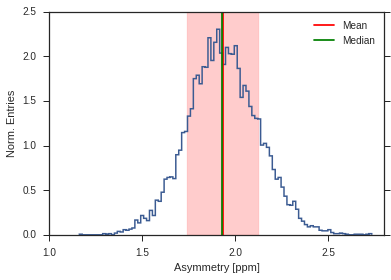

In [22]:
pp.figure()
pp.hist(apv, bins=100, histtype='step', normed=True, color=sns.xkcd_rgb['denim blue'], lw=1.5)
ymin, ymax = pp.ylim()
pp.tick_params(top=False)
pp.plot([apv_mean, apv_mean], [ymin, ymax], color='r', label='Mean')
pp.plot([np.median(apv), np.median(apv)], [ymin, ymax], color='g', label='Median')
pp.fill_between([apv_mean-apv_err, apv_mean+apv_err], ymin, ymax, color='r', alpha=0.2)
pp.legend(loc='upper right')
pp.xlabel('Asymmetry [ppm]')
pp.ylabel('Norm. Entries')
pp.savefig('plots/al_mc_asym_distribution.png', bbox_inches='tight')
pp.show()

In [23]:
%time calculate_apv_uncertainty(data, label)

CPU times: user 16.6 s, sys: 113 ms, total: 16.7 s
Wall time: 16.9 s


In [24]:
#100*(data.A_pv.loc['A_msr'].std()/data.A_pv.loc['A_msr'].mean())
data.A_pv.loc['A_msr'].std()

0.10698235187438462

In [25]:
means = np.ones(len(label))
std = np.ones(len(label))

In [26]:
for l in range(len(label)):
    means[l] = np.mean(data.A_pv.loc[label[l]])
    std[l] = np.std(data.A_pv.loc[label[l]])

In [27]:
bar_range = np.arange(0.0,len(label))

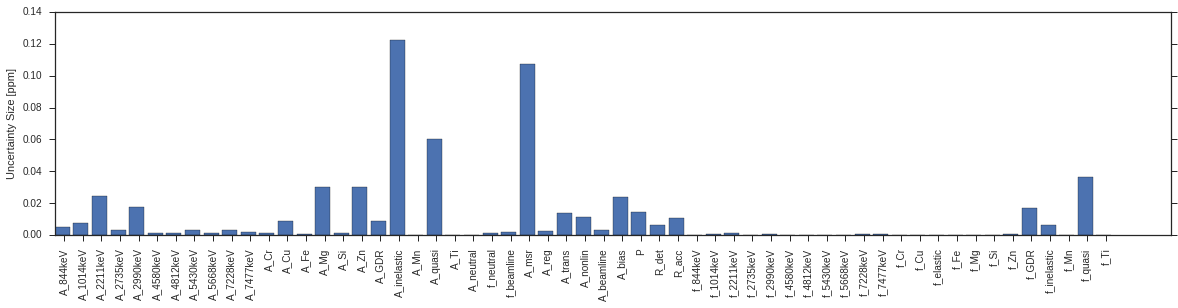

In [28]:
pp.figure(figsize=(20,4))
pp.bar(bar_range, std)
pp.tick_params(top=False)
pp.xticks(bar_range+0.5, label, rotation=90, horizontalalignment='center')
pp.ylabel('Uncertainty Size [ppm]')
pp.savefig('plots/al_mc_uncertainty_chart.png', bbox_inches='tight')
pp.show()

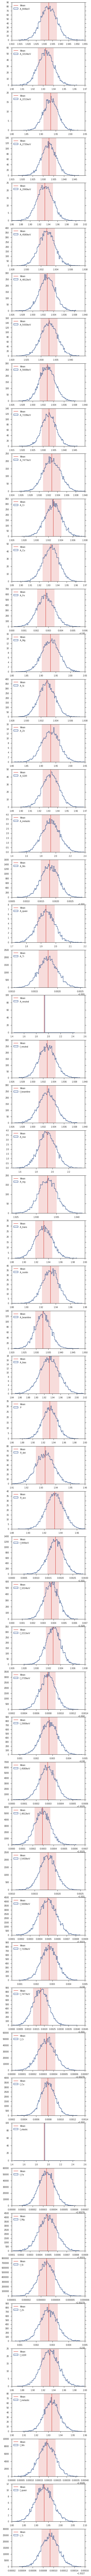

In [29]:
f, ax = pp.subplots(len(label),1, figsize=(6.022500138888888, len(label)*3.7221097830842953))
pp.subplots_adjust(hspace=0.2)
for l in range(len(label)):
    ax[l].hist(data.loc[label[l]].A_pv, 
               bins=100, 
               histtype='step', 
               normed=True, 
               color=sns.xkcd_rgb['denim blue'], 
               lw=1.5, 
               label=label[l])
    ymin, ymax = ax[l].get_ylim()
    ax[l].plot([means[l],means[l]], [ymin, ymax], color=sns.xkcd_rgb['pale red'], label='Mean')
    ax[l].fill_between([means[l]-std[l], means[l]+std[l]], ymin, ymax, color=sns.xkcd_rgb['pale red'], alpha=0.2)
    ax[l].tick_params(top=False)
    ax[l].legend(loc='upper left')

In [30]:
for l in range(len(label)):
    print("{:s}: {:.6f} +- {:.6f} [ppm]".format(label[l], means[l], std[l]))

A_844keV: 1.932741 +- 0.005016 [ppm]
A_1014keV: 1.932571 +- 0.007463 [ppm]
A_2211keV: 1.932886 +- 0.024350 [ppm]
A_2735keV: 1.932790 +- 0.003455 [ppm]
A_2990keV: 1.932555 +- 0.017318 [ppm]
A_4580keV: 1.932799 +- 0.001097 [ppm]
A_4812keV: 1.932810 +- 0.001491 [ppm]
A_5430keV: 1.932753 +- 0.002860 [ppm]
A_5668keV: 1.932794 +- 0.001464 [ppm]
A_7228keV: 1.932793 +- 0.003381 [ppm]
A_7477keV: 1.932769 +- 0.001890 [ppm]
A_Cr: 1.932804 +- 0.001339 [ppm]
A_Cu: 1.932832 +- 0.008897 [ppm]
A_Fe: 1.932792 +- 0.000707 [ppm]
A_Mg: 1.932793 +- 0.029946 [ppm]
A_Si: 1.932798 +- 0.001117 [ppm]
A_Zn: 1.932874 +- 0.030178 [ppm]
A_GDR: 1.932724 +- 0.009002 [ppm]
A_inelastic: 1.934077 +- 0.122389 [ppm]
A_Mn: 1.932796 +- 0.000295 [ppm]
A_quasi: 1.932955 +- 0.060321 [ppm]
A_Ti: 1.932794 +- 0.000205 [ppm]
A_neutral: 1.932793 +- 0.000000 [ppm]
f_neutral: 1.932813 +- 0.001580 [ppm]
f_beamline: 1.932797 +- 0.001655 [ppm]
A_msr: 1.933875 +- 0.106977 [ppm]
A_reg: 1.932825 +- 0.002227 [ppm]
A_trans: 1.932538 +- 0.013

In [44]:
for l in range(len(label)):
    print("{:s}: {:.6f}".format(label[l], 100.0*(std[l]/means[l])))

A_844keV: 0.259516
A_1014keV: 0.386185
A_2211keV: 1.259760
A_2735keV: 0.178782
A_2990keV: 0.896135
A_4580keV: 0.056753
A_4812keV: 0.077148
A_5430keV: 0.147977
A_5668keV: 0.075729
A_7228keV: 0.174944
A_7477keV: 0.097783
A_Cr: 0.069260
A_Cu: 0.460313
A_Fe: 0.036571
A_Mg: 1.549342
A_Si: 0.057807
A_Zn: 1.561297
A_GDR: 0.465758
A_inelastic: 6.328051
A_Mn: 0.015263
A_quasi: 3.120669
A_Ti: 0.010607
A_neutral: 0.000000
f_neutral: 0.081740
f_beamline: 0.085620
A_msr: 5.531744
A_reg: 0.115242
A_trans: 0.720813
A_nonlin: 0.593477
A_beamline: 0.162635
A_bias: 1.236339
P: 0.734700
R_det: 0.323394
R_acc: 0.554640
f_844keV: 0.016821
f_1014keV: 0.036379
f_2211keV: 0.060284
f_2735keV: 0.006487
f_2990keV: 0.026605
f_4580keV: 0.003421
f_4812keV: 0.003878
f_5430keV: 0.009319
f_5668keV: 0.005008
f_7228keV: 0.025907
f_7477keV: 0.024081
f_Cr: 0.000437
f_Cu: 0.006020
f_elastic: 0.000000
f_Fe: 0.000381
f_Mg: 0.005099
f_Si: 0.000029
f_Zn: 0.028020
f_GDR: 0.880208
f_inelastic: 0.328704
f_Mn: 0.002404
f_quasi: 1.

In [51]:
sigma_tot = np.sqrt(np.sum(np.square(std)))

In [54]:
for l in range(len(label)):
    print('{:s}: {:.6f}'.format(label[l], 100.0*np.square(std[l]/sigma_tot)))

A_844keV: 0.069896
A_1014keV: 0.154753
A_2211keV: 1.647266
A_2735keV: 0.033174
A_2990keV: 0.833272
A_4580keV: 0.003343
A_4812keV: 0.006177
A_5430keV: 0.022726
A_5668keV: 0.005952
A_7228keV: 0.031765
A_7477keV: 0.009923
A_Cr: 0.004979
A_Cu: 0.219923
A_Fe: 0.001388
A_Mg: 2.491384
A_Si: 0.003468
A_Zn: 2.530194
A_GDR: 0.225131
A_inelastic: 41.616265
A_Mn: 0.000242
A_quasi: 10.109145
A_Ti: 0.000117
A_neutral: 0.000000
f_neutral: 0.006935
f_beamline: 0.007608
A_msr: 31.794820
A_reg: 0.013784
A_trans: 0.539110
A_nonlin: 0.365633
A_beamline: 0.027452
A_bias: 1.586191
P: 0.560244
R_det: 0.108539
R_acc: 0.319314
f_844keV: 0.000294
f_1014keV: 0.001374
f_2211keV: 0.003772
f_2735keV: 0.000044
f_2990keV: 0.000735
f_4580keV: 0.000012
f_4812keV: 0.000016
f_5430keV: 0.000090
f_5668keV: 0.000026
f_7228keV: 0.000697
f_7477keV: 0.000602
f_Cr: 0.000000
f_Cu: 0.000038
f_elastic: 0.000000
f_Fe: 0.000000
f_Mg: 0.000027
f_Si: 0.000000
f_Zn: 0.000815
f_GDR: 0.804161
f_inelastic: 0.112148
f_Mn: 0.000006
f_quasi:

In [32]:
# Mean difference
for l in range(len(label)):
    print('{:s}: {:.6f}'.format(label[l], 100.0*(apv_mean-means[l])/apv_mean))

A_844keV: 0.130346
A_1014keV: 0.139153
A_2211keV: 0.122859
A_2735keV: 0.127803
A_2990keV: 0.139934
A_4580keV: 0.127348
A_4812keV: 0.126772
A_5430keV: 0.129726
A_5668keV: 0.127596
A_7228keV: 0.127667
A_7477keV: 0.128900
A_Cr: 0.127072
A_Cu: 0.125665
A_Fe: 0.127684
A_Mg: 0.127669
A_Si: 0.127390
A_Zn: 0.123448
A_GDR: 0.131204
A_inelastic: 0.061298
A_Mn: 0.127504
A_quasi: 0.119293
A_Ti: 0.127579
A_neutral: 0.127636
f_neutral: 0.126644
f_beamline: 0.127454
A_msr: 0.071763
A_reg: 0.126014
A_trans: 0.140836
A_nonlin: 0.117218
A_beamline: 0.127690
A_bias: 0.135254
P: 0.126316
R_det: 0.130665
R_acc: 0.121988
f_844keV: 0.127731
f_1014keV: 0.127933
f_2211keV: 0.127903
f_2735keV: 0.127755
f_2990keV: 0.127446
f_4580keV: 0.127598
f_4812keV: 0.127585
f_5430keV: 0.127642
f_5668keV: 0.127623
f_7228keV: 0.127385
f_7477keV: 0.128077
f_Cr: 0.127642
f_Cu: 0.127587
f_elastic: 0.127636
f_Fe: 0.127638
f_Mg: 0.127630
f_Si: 0.127636
f_Zn: 0.128311
f_GDR: 0.124610
f_inelastic: 0.123574
f_Mn: 0.127652
f_quasi: 0.